# Stochastic matching on simple graphs

This is the notebook associated with the paper [*Stochastic dynamic matching: A mixed graph-theory and linear-algebra approach*](https://hal.archives-ouvertes.fr/hal-03502084).

Its goal is to demonstrate how the results from the paper above can be obtained using the [stochasting_matching](https://balouf.github.io/stochastic_matching/index.html) package.

It contains in particular the production of all simulation-based results from the paper.

Note that the notebook is NOT intended to be self-contained. Please refer to the paper for context and explanations.

In [1]:
import stochastic_matching as sm
from stochastic_matching.display import VIS_OPTIONS
VIS_OPTIONS['height'] = 300
VIS_OPTIONS['interaction']['navigationButtons'] = False
import numpy as np

The default simulation corresponds to $10^{digits}$ arrivals.

- Values below $6$ should only be used for debugging.
- Use $10$ for high quality results.

Parallelization is used. You can cap the number of // jobs.

In [2]:
digits = 8
T = 10**digits

## Basis of the kernel

This section of the notebook reproduces figures from *Basis of the kernel of the incidence matrix* parts.

### Vector of the kernel space for the diamond graph.

In [3]:
diamond = sm.CycleChain(names = [str(i) for i in range(1, 5)])
diamond.show_kernel(disp_rates=False)

### Vector of the kernel space for a kayak paddle.

In [4]:
kayak = sm.KayakPaddle(3, 2, 5, names = [str(i) for i in range(1, 10)])
kayak.show_kernel(disp_rates=False)

### Two possible constructions of a kernel basis for the triamond graph

In [5]:
triamond = sm.CycleChain(c=3, names = ["1", "5", "2", "4", "3"])
triamond.show_graph()

In [6]:
triamond.seeds = [1, 3]
triamond.show_kernel(disp_rates=False)

In [7]:
triamond.seeds = [2, 4]
triamond.show_kernel(disp_rates=False)

### Two possible constructions of a kernel basis for the codomino graph

In [8]:
codomino = sm.Codomino(names=["1", "6", "2", "3", "5", "4"])
codomino.show_graph()

In [9]:
codomino.seeds = [1, 4]
codomino.show_kernel(disp_rates=False)

In [10]:
codomino.seeds = [0, 2]
codomino.show_kernel(disp_rates=False)

## Bijective vertices and facets of the convex polytope

This section of the notebook reproduces examples of polytopes.

### Essential matching, simple polytope

In [11]:
# Generic solution

codomino = sm.Codomino(names=["1", "6", "2", "3", "5", "4"], rates=[4, 5, 5, 3, 3, 2])
codomino.base_flow = codomino.maximin
codomino.seeds = [0, 2]
codomino.show_kernel(disp_rates=False, disp_flow=True)

In [12]:
# Vertices
codomino.vertices

[{'kernel_coordinates': array([-1., -1.]),
  'edge_coordinates': array([1., 3., 1., 3., 1., 0., 2., 0.]),
  'null_edges': [5, 7],
  'bijective': True},
 {'kernel_coordinates': array([-1.,  0.]),
  'edge_coordinates': array([1., 3., 2., 2., 0., 1., 2., 0.]),
  'null_edges': [4, 7],
  'bijective': True},
 {'kernel_coordinates': array([0., 1.]),
  'edge_coordinates': array([2., 2., 3., 0., 0., 2., 1., 1.]),
  'null_edges': [3, 4],
  'bijective': True},
 {'kernel_coordinates': array([ 1., -1.]),
  'edge_coordinates': array([3., 1., 1., 1., 3., 0., 0., 2.]),
  'null_edges': [5, 6],
  'bijective': True},
 {'kernel_coordinates': array([1., 0.]),
  'edge_coordinates': array([3., 1., 2., 0., 2., 1., 0., 2.]),
  'null_edges': [3, 6],
  'bijective': True}]

In [13]:
for i in range(5):
    codomino.show_vertex(i, disp_rates=False, vis_options={'height': 150})

### Non-Essential matching, simple polytope

In [14]:
# Generic solution
codomino.rates = [2, 2, 4, 4, 2, 2]
codomino.base_flow = codomino.kernel_to_edge([1/3, 0])
codomino.show_kernel(disp_rates=False, disp_flow=True)

In [15]:
# Vertices
codomino.vertices

[{'kernel_coordinates': array([-1., -1.]),
  'edge_coordinates': array([0., 2., 0., 2., 2., 0., 2., 0.]),
  'null_edges': [0, 2, 5, 7],
  'bijective': False},
 {'kernel_coordinates': array([-1.,  1.]),
  'edge_coordinates': array([0., 2., 2., 0., 0., 2., 2., 0.]),
  'null_edges': [0, 3, 4, 7],
  'bijective': False},
 {'kernel_coordinates': array([ 1., -1.]),
  'edge_coordinates': array([2., 0., 0., 0., 4., 0., 0., 2.]),
  'null_edges': [1, 2, 3, 5, 6],
  'bijective': False}]

In [16]:
for i in range(3):
    codomino.show_vertex(i, disp_rates=False, vis_options={'height': 150})

### Non-simple polytope

In [17]:
pyramid = sm.Pyramid(rates = [4, 3, 3, 3, 6, 6, 3, 4, 4, 4],
                     names = ["9", "2", "1", "8", "7", "3", "4", "5", "6", "10"])
pyramid.seeds = [0, 12, 2]
pyramid.base_flow = pyramid.kernel_to_edge([1/6, 1/6, 1/6])
pyramid.show_kernel(disp_flow=True, disp_rates = False, vis_options={'height': 450})

In [18]:
pyramid.vertices

[{'kernel_coordinates': array([-1.,  1.,  0.]),
  'edge_coordinates': array([1., 3., 0., 2., 0., 3., 3., 0., 1., 2., 1., 1., 3.]),
  'null_edges': [2, 4, 7],
  'bijective': True},
 {'kernel_coordinates': array([-1., -1.,  0.]),
  'edge_coordinates': array([1., 3., 0., 2., 0., 3., 1., 2., 3., 0., 1., 3., 1.]),
  'null_edges': [2, 4, 9],
  'bijective': True},
 {'kernel_coordinates': array([0., 0., 1.]),
  'edge_coordinates': array([2., 2., 1., 0., 0., 3., 3., 0., 3., 0., 2., 2., 2.]),
  'null_edges': [3, 4, 7, 9],
  'bijective': False},
 {'kernel_coordinates': array([ 1., -1.,  0.]),
  'edge_coordinates': array([3., 1., 0., 0., 2., 1., 3., 2., 3., 0., 1., 3., 1.]),
  'null_edges': [2, 3, 9],
  'bijective': True},
 {'kernel_coordinates': array([1., 1., 0.]),
  'edge_coordinates': array([3., 1., 0., 0., 2., 1., 5., 0., 1., 2., 1., 1., 3.]),
  'null_edges': [2, 3, 7],
  'bijective': True}]

In [19]:
for i in range(5):
    pyramid.show_vertex(i, disp_rates=False, vis_options={'height': 250})

## Greedy policies

This section of the notebook builds the figures from *Matching rates in surjective-only graphs: greedy policies*.

### Complete graph

In [20]:
# Note: the kernel is reversed compared to the figure in the paper; this does not change anything but signes in practice

complete = sm.Complete(n=4, names=[str(i) for i in range(1, 5)])
complete.show_kernel(disp_rates=False)

In [21]:
complete.vertices

[{'kernel_coordinates': array([-1., -1.]),
  'edge_coordinates': array([0., 0., 3., 3., 0., 0.]),
  'null_edges': [0, 1, 4, 5],
  'bijective': False},
 {'kernel_coordinates': array([-1.,  2.]),
  'edge_coordinates': array([3., 0., 0., 0., 0., 3.]),
  'null_edges': [1, 2, 3, 4],
  'bijective': False},
 {'kernel_coordinates': array([ 2., -1.]),
  'edge_coordinates': array([0., 3., 0., 0., 3., 0.]),
  'null_edges': [0, 2, 3, 5],
  'bijective': False}]

For heavy computational stuff, we use the following approach:
- Simulations are run on parallel.
- Results of interest are saved in a pickle file.
- If the pickle file exists, it bypasses the computation.

In [22]:
from stochastic_matching import XP, Iterator, evaluate
from multiprocess import Pool

In [23]:
base = {'model': complete, 'n_steps': T, 'seed': 42}
xps = sum([XP('Longest', simulator='longest', **base),
           XP('FCFM', simulator='fcfm', **base),
           XP('Random Edge', simulator='random_edge', **base),
           XP('Random Item', simulator='random_item', **base),
           XP('Priority', simulator='priority', weights=[1, 10, 0, -1, 3, 4], **base)
          ])

In [24]:
def simu_flow_coordinates(model):
    flow = model.simulation
    return model.edge_to_kernel(flow)

In [25]:
with Pool(5) as p:
    res = evaluate(xps, simu_flow_coordinates, pool=p, cache_name='complete')
res

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:41<00:00,  8.27s/it]


{'Longest': array([0., 0.]),
 'FCFM': array([0., 0.]),
 'Random Edge': array([0., 0.]),
 'Random Item': array([0., 0.]),
 'Priority': array([0., 0.])}

No matter what policy is used, the results is always the same in a complete graph, as all greedy policies are equivalent.

### Diamond graph

In [26]:
def beta_to_model(beta):
    return sm.CycleChain(names=[str(i) for i in range(1, 5)], rates=[1/4, 1/4+beta, 1/4+beta, 1/4])

n_points = 30
β_vect = np.logspace(-3, 1, n_points)
model_iter = Iterator('model', β_vect, 'β', beta_to_model)

In [27]:
xps = XP('Greedy vertex', simulator='priority', weights=[1, 0, 0, 0, 1], n_steps=T, iterator=model_iter)

In [28]:
def alpha(model):
    flow = model.simulation
    return {'α': (flow[0]+flow[-1]-flow[1]-flow[3])/4}

In [29]:
with Pool() as p:
    res = evaluate(xps, alpha, pool=p, cache_name='diamond')['Greedy vertex']['α']

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [03:09<00:00,  6.31s/it]


In [30]:
from matplotlib import pyplot as plt

def min_flow2(beta):
    q13=1/(4*beta)
    q2=1/2+2*beta
    p0 = 1/(1+q13+2*q2)
    return p0*q2/4 + p0/(1+8*beta)*(1/4+beta)-1/8

lbi = [min_flow2(β) for β in β_vect]
ubi = [-min_flow2(β) for β in β_vect]

In [31]:
import tikzplotlib
def tikzplotlib_fix_ncols(obj):
    """
    workaround for matplotlib 3.6 renamed legend's _ncol to _ncols, which breaks tikzplotlib
    """
    if hasattr(obj, "_ncols"):
        obj._ncol = obj._ncols
    for child in obj.get_children():
        tikzplotlib_fix_ncols(child)

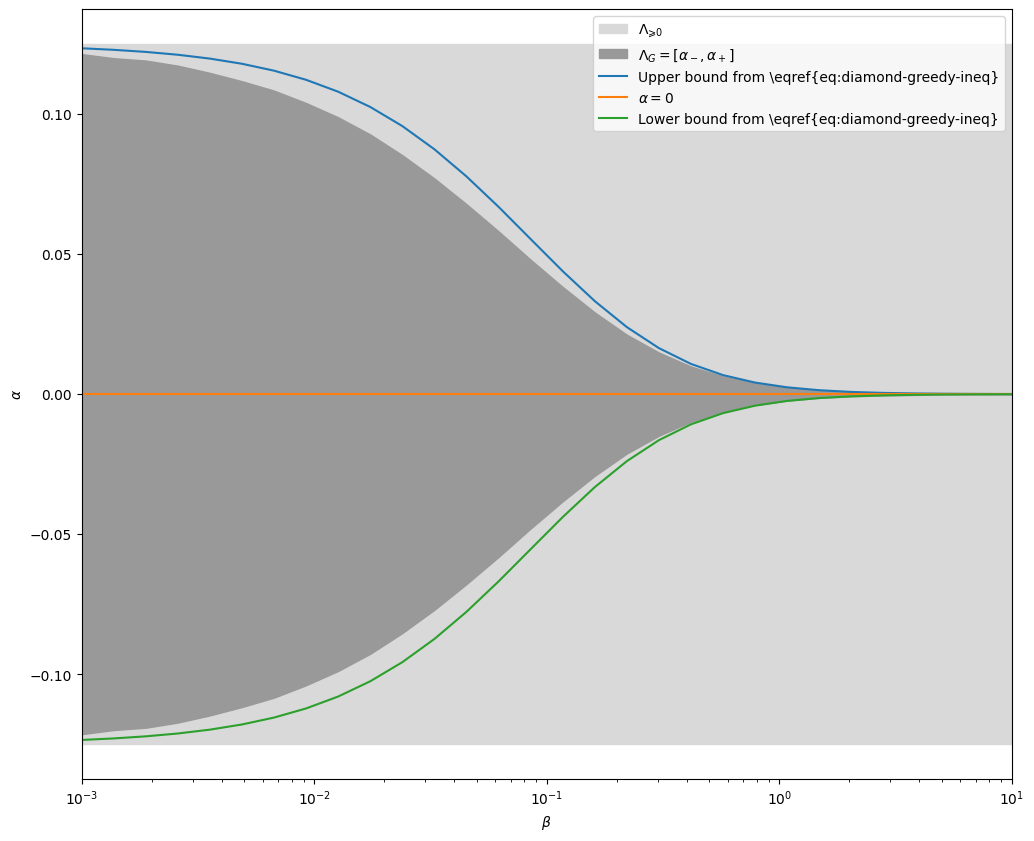

In [32]:
fig = plt.figure(figsize=[12, 10])
res = np.array(res)
plt.fill_between(β_vect, -1/8*np.ones(n_points), 1/8*np.ones(n_points), label = '$\Lambda_{\geqslant 0}$', color = [.85, .85, .85, 1])
plt.fill_between(β_vect, -res, res, label = '$\Lambda_G = [\\alpha_-, \\alpha_+]$', color = [.6, .6, .6, 1])

plt.semilogx(β_vect, ubi, label='Upper bound from \eqref{eq:diamond-greedy-ineq}')
plt.semilogx(β_vect, np.zeros(n_points), label='$\\alpha=0$')
plt.semilogx(β_vect, lbi, label='Lower bound from \eqref{eq:diamond-greedy-ineq}')

plt.xlabel('$\\beta$')
plt.ylabel('$\\alpha$')
plt.legend()
plt.xlim([β_vect[0], β_vect[-1]])
tikzplotlib_fix_ncols(fig)
tikzplotlib.save(f"diamond_{digits}.tex", axis_width="12cm", axis_height="8cm",
)
plt.show()

### Fish graph

In [33]:
fish = sm.KayakPaddle(3, 0, 4, names=[str(i) for i in range(1, 7)],
                      rates=[4, 4, 3, 2, 3, 2])
fish.base_flow = fish.optimize_edge(3, -1)
fish.show_kernel(disp_rates=False, disp_flow=True)

#### Limitation lemma

In [34]:
paw = sm.Tadpole(names = [str(i) for i in range(1, 5)], rates=[4, 4, 3, 1])
paw.stabilizable

True

In [35]:
paw.base_flow

array([3., 1., 1., 1.])

In [36]:
paw.run('priority', weights=[0, 1, 1, 0], max_queue=10**7, n_steps=10**7)

True

In [37]:
paw.show_flow(disp_rates=False)

Theory predict a matching rate $9/11$ for node 4.

In [38]:
9/11

0.8181818181818182

#### Unstable policy lemma

In [39]:
fish.run('priority', weights=[0, 3, 3, 2, 0, 0, 2], max_queue=10**7, n_steps=10**7)
fish.show_flow(disp_rates=False)

Queues 3 and 5 are empty because 4 is transient and never empty.

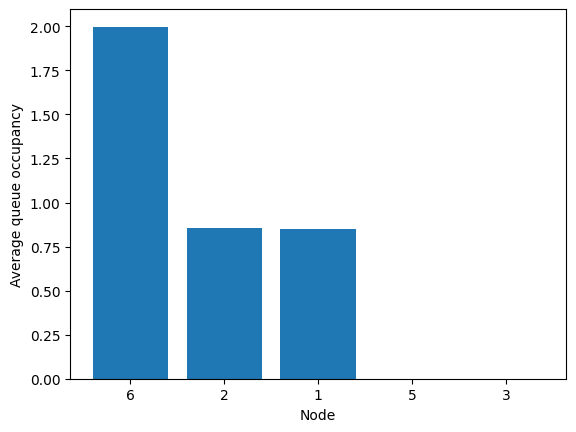

In [40]:
fig = fish.simulator.show_average_queues(sort=True, indices=[0, 1, 2, 4, 5])

For finite simulations, *transient* means *very big queue*.

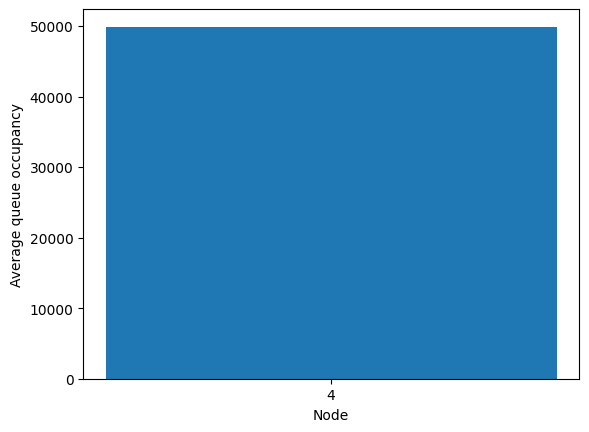

In [41]:
fig = fish.simulator.show_average_queues(sort=True, indices=[3])

#### Threshold-controlled priorities

In [42]:
fish.run('priority', weights=[0, 3, 3, 2, 0, 0, 2], threshold=100, counterweights=[0, 1, 1, 2, 0, 0, 2],
         n_steps=10**7)

True

In [43]:
fish.show_flow(disp_rates=False)

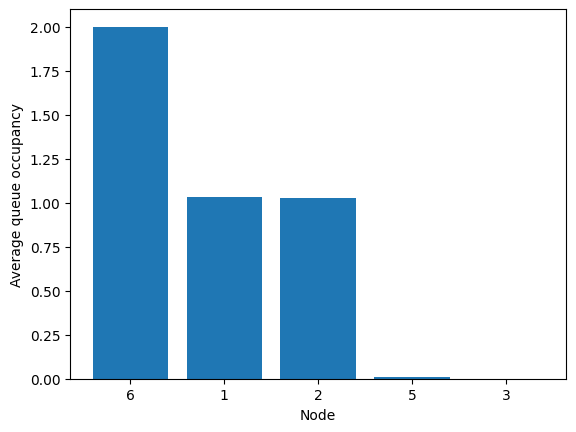

In [44]:
fig = fish.simulator.show_average_queues(sort=True, indices=[0, 1, 2, 4, 5])

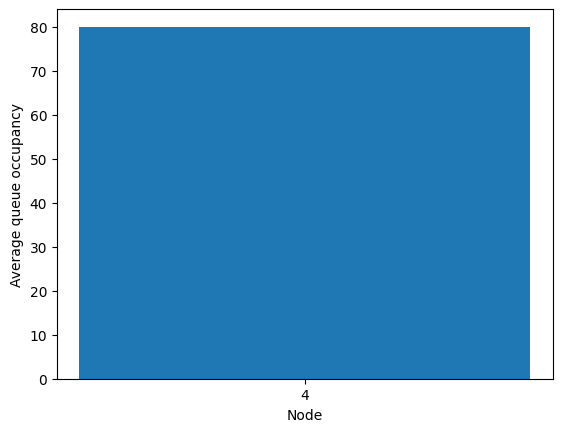

In [45]:
fig = fish.simulator.show_average_queues(sort=True, indices=[3])

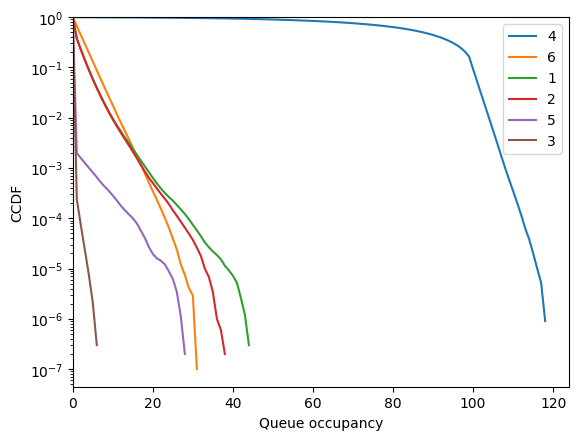

In [46]:
fig = fish.simulator.show_ccdf(sort=True)

The default priority policy implemented in the package is conditioned on the max queue size, while the policy described on the paper is conditioned on the queue size of one specific node. We can craft a new selector for the experiment.

In [47]:
from numba import njit

def pivot_priority_selector(weights, threshold, counterweights, pivot):
    """
    Make a jitted edge selector based on priorities.
    """
    def priority_selector(graph, queue_size, node):
        best_edge = -1
        best_weight = -1000

        if threshold is None or queue_size[pivot]<threshold:
            w = weights
        else:
            w = counterweights

        for e in graph.edges(node):
            for v in graph.nodes(e):
                if queue_size[v] == 0:
                    break
            else:
                if w[e] > best_weight:
                    best_weight = w[e]
                    best_edge = e
        return best_edge

    return njit(priority_selector)

class Fish(sm.Priority):
    name = 'fish'
    def __init__(self, model, pivot, **kwargs):
        self.pivot = pivot
        super().__init__(model, **kwargs)
    def set_internal(self):
        super().set_internal()
        self.internal['selector'] = pivot_priority_selector(weights=self.weights,
                                                           threshold=self.threshold,
                                                           counterweights=self.counterweights,
                                                           pivot=self.pivot)

In [48]:
sm.common.get_classes(sm.Simulator)

{'fcfm': stochastic_matching.simulator.fcfm.FCFM,
 'priority': stochastic_matching.simulator.priority.Priority,
 'random_edge': stochastic_matching.simulator.random_edge.RandomEdge,
 'random_item': stochastic_matching.simulator.random_item.RandomItem,
 'e_filtering': stochastic_matching.simulator.e_filtering.EFiltering,
 'longest': stochastic_matching.simulator.longest.Longest,
 'virtual_queue': stochastic_matching.simulator.virtual_queue.VirtualQueue,
 'fish': __main__.Fish}

In [49]:
fish = sm.KayakPaddle(3, 0, 4, names=[str(i) for i in range(1, 7)],
                      rates=[4, 4, 3, 2, 3, 2])
k_vect = 2**(np.arange(10))
k_iter = Iterator('threshold', k_vect, 'k')

base = {'iterator': k_iter, 'n_steps': T, 'seed': 42}

xps = XP('pos', simulator=Fish, model=fish, 
         weights=[0, 3, 3, 2, 0, 0, 2], counterweights=[0, 1, 1, 2, 0, 0, 2],
         pivot=3, **base)
xps += XP('neg', simulator=Fish, model=fish, 
         weights=[0, 3, 3, 0, 2, 2, 0], counterweights=[0, 1, 1, 0, 2, 2, 0],
         pivot=5, **base)

def edge_flow(model):
    return {'flow': model.simulation[3]}

In [50]:
import dill
dill.settings['recurse'] = True
with Pool() as p:
    res = evaluate(xps, edge_flow, pool=p, cache_name='fish')

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [02:55<00:00,  8.76s/it]


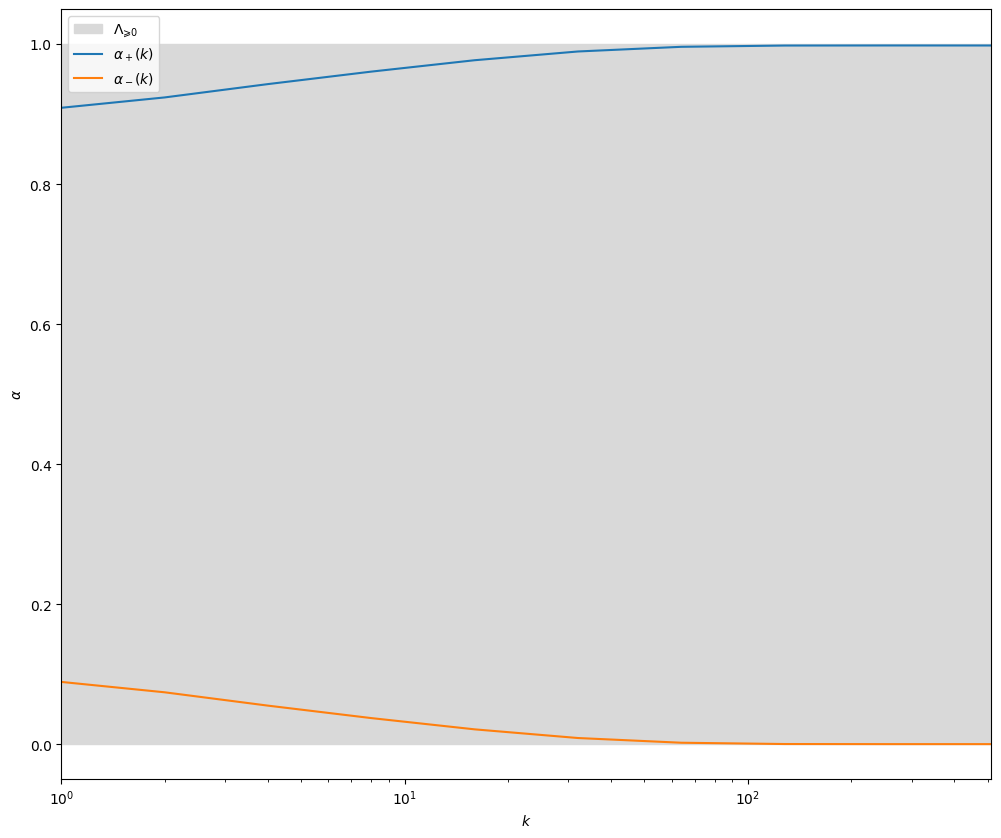

In [51]:
fig = plt.figure(figsize=[12, 10])
n_points = len(k_vect)
alm = res['neg']['flow']
alp = res['pos']['flow']

plt.fill_between(k_vect, np.zeros(n_points), np.ones(n_points), label = '$\Lambda_{\geqslant 0}$', color = [.85, .85, .85, 1])
plt.semilogx(k_vect, alp, label = '$\\alpha_+(k)$')
plt.semilogx(k_vect, alm, label = '$\\alpha_-(k)$')

plt.xlabel('$k$')
plt.ylabel('$\\alpha$')
plt.legend()
plt.xlim([k_vect[0], k_vect[-1]])
tikzplotlib_fix_ncols(fig)
tikzplotlib.save(f"fish_semilog_{digits}.tex", axis_width="6.5cm", axis_height="6cm")
plt.show()

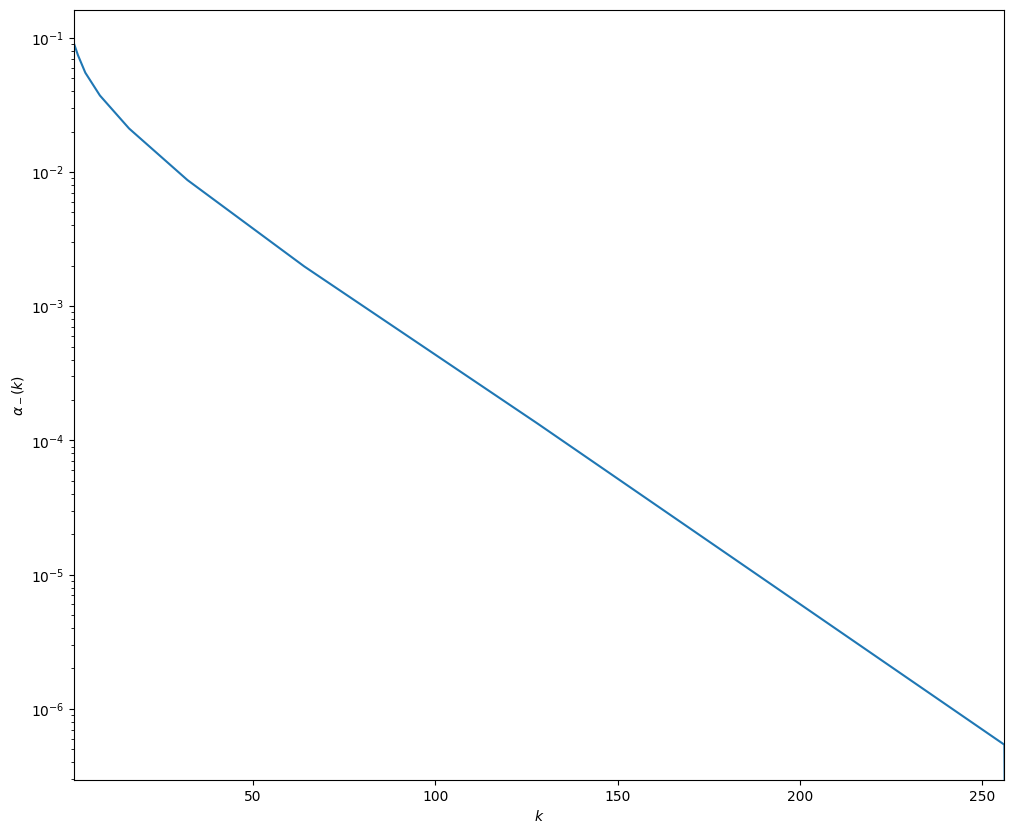

In [52]:
fig=plt.figure(figsize=[12, 10])
n_points = len(k_vect)
plt.semilogy(k_vect, alm)
plt.xlabel('$k$')
plt.ylabel('$\\alpha_-(k)$')
plt.xlim([k_vect[0], 256])
tikzplotlib_fix_ncols(fig)
tikzplotlib.save(f"fish_loglog_{digits}.tex", axis_width="6.5cm", axis_height="6cm")
plt.show()

## Semi-filtering policies on an injective-only vertex

In [53]:
codomino = sm.Codomino(rates=[2, 4, 2, 2, 4, 2], names=["1", "6", "2", "3", "5", "4"])
codomino.base_flow = np.array([1.0, 1.0, 1.0, 2.0, 0.0, 1.0, 1.0, 1.0])
codomino.vertices

[{'kernel_coordinates': array([-1., -1.]),
  'edge_coordinates': array([0., 2., 0., 4., 0., 0., 2., 0.]),
  'null_edges': [0, 2, 4, 5, 7],
  'bijective': False},
 {'kernel_coordinates': array([-1.,  1.]),
  'edge_coordinates': array([2., 0., 0., 2., 2., 0., 0., 2.]),
  'null_edges': [1, 2, 5, 6],
  'bijective': False},
 {'kernel_coordinates': array([1., 1.]),
  'edge_coordinates': array([2., 0., 2., 0., 0., 2., 0., 2.]),
  'null_edges': [1, 3, 4, 6],
  'bijective': False}]

In [54]:
codomino.show_vertex(0, disp_rates=False)

In [55]:
codomino = sm.Codomino(rates=[2, 4, 2, 2, 4, 2])
codomino.base_flow = np.array([1.0, 1.0, 1.0, 2.0, 0.0, 1.0, 1.0, 1.0])
forbidden_edges = codomino.vertices[0]['null_edges']
k_vect = 16*4**np.arange(6)
k_iter = Iterator('k', k_vect)
base = {'model': codomino, 'simulator': 'longest', 'n_steps':T, 'max_queue': 20000, 'seed': 42,
       'forbidden_edges': forbidden_edges}
xps = XP('Injective', **base, iterator=k_iter)


In [56]:
def metrics(model):
    return {'ccdf': model.simulator.compute_ccdf()[0, :], 
            'leak': np.sum(model.simulation[codomino.vertices[0]['null_edges']])}

In [57]:
with Pool() as p:
    res = evaluate(xps, metrics, pool=p, cache_name='injective')['Injective']

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [01:17<00:00, 12.84s/it]


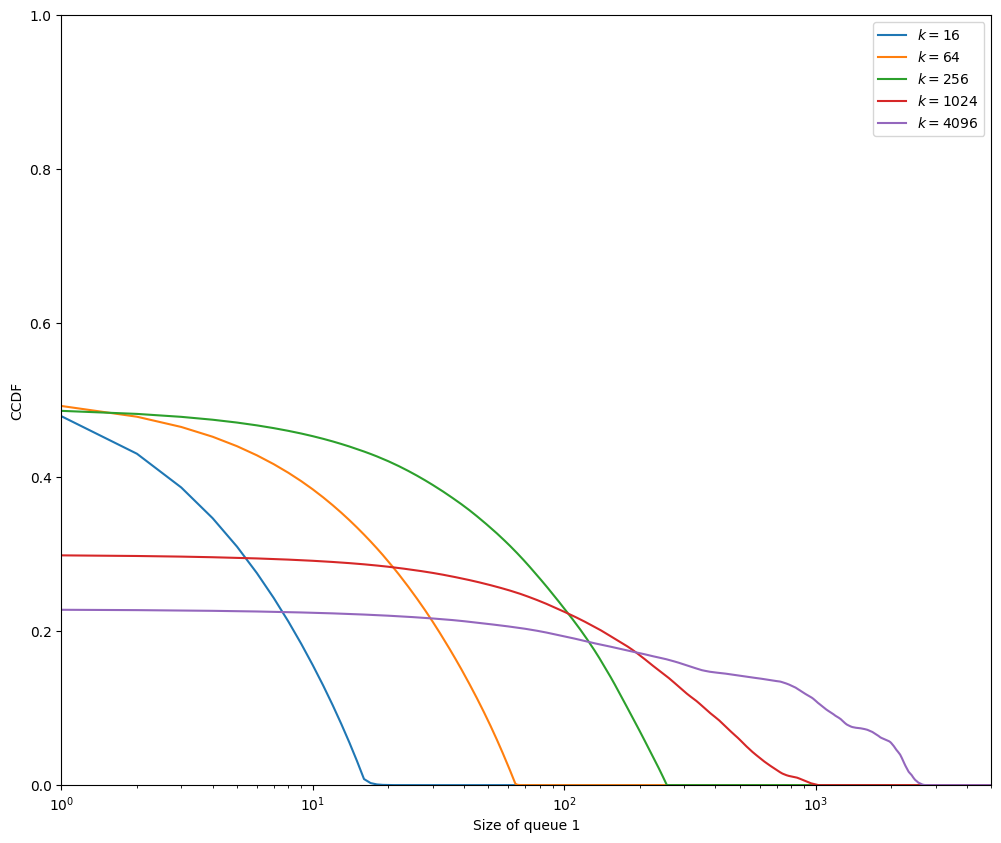

In [58]:
fig=plt.figure(figsize=[12, 10])
for i, k in enumerate(res['k'][:-1]):
    plt.semilogx(res['ccdf'][i], label=f"$k={k}$")
plt.legend(loc=1)
plt.ylim([0, 1])
plt.xlim([1, 5000])
plt.xlabel("Size of queue 1")
plt.ylabel("CCDF")
tikzplotlib_fix_ncols(fig)
tikzplotlib.save(f"codomino_semilog_{digits}.tex", axis_width="4.5cm", axis_height="4cm")
plt.show()

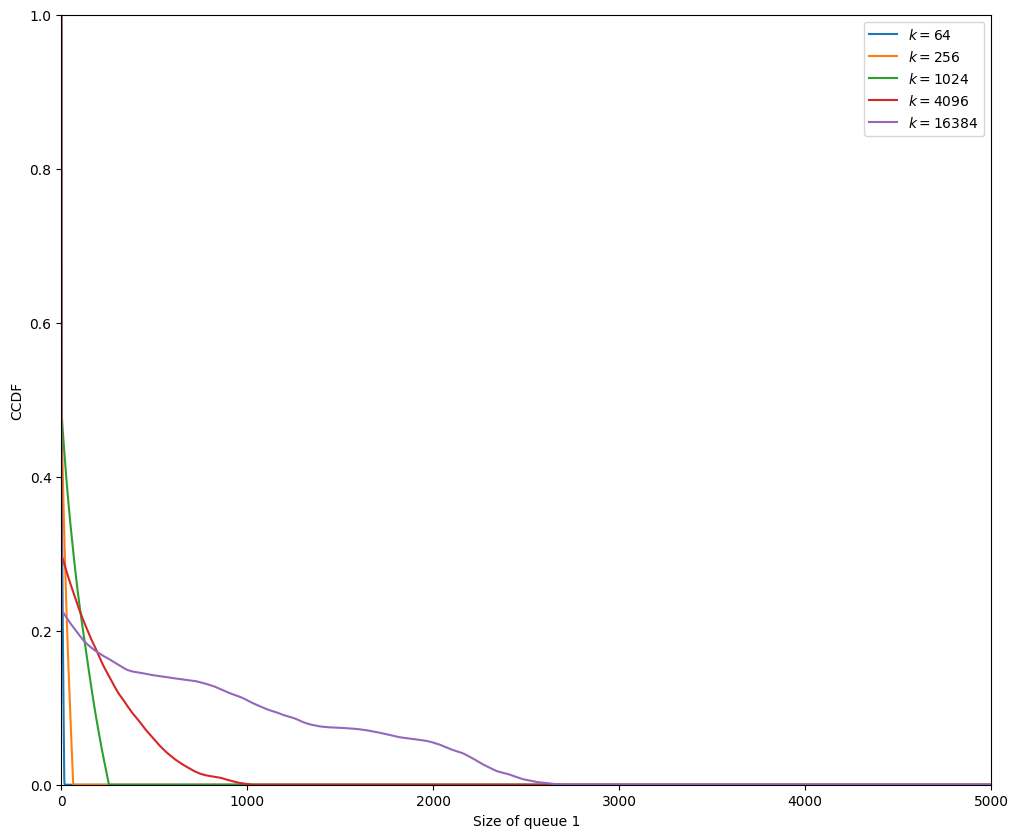

In [59]:
fig=plt.figure(figsize=[12, 10])
for i, k in enumerate(res['k'][1:]):
    plt.plot(res['ccdf'][i], label=f"$k={k}$")
plt.legend()
plt.ylim([0, 1])
plt.xlim([0, 5000])
plt.xlabel("Size of queue 1")
plt.ylabel("CCDF")
tikzplotlib.clean_figure()
tikzplotlib_fix_ncols(fig)
tikzplotlib.save(f"codomino_linear_{digits}.tex", axis_width="6.5cm", axis_height="6cm")
plt.show()

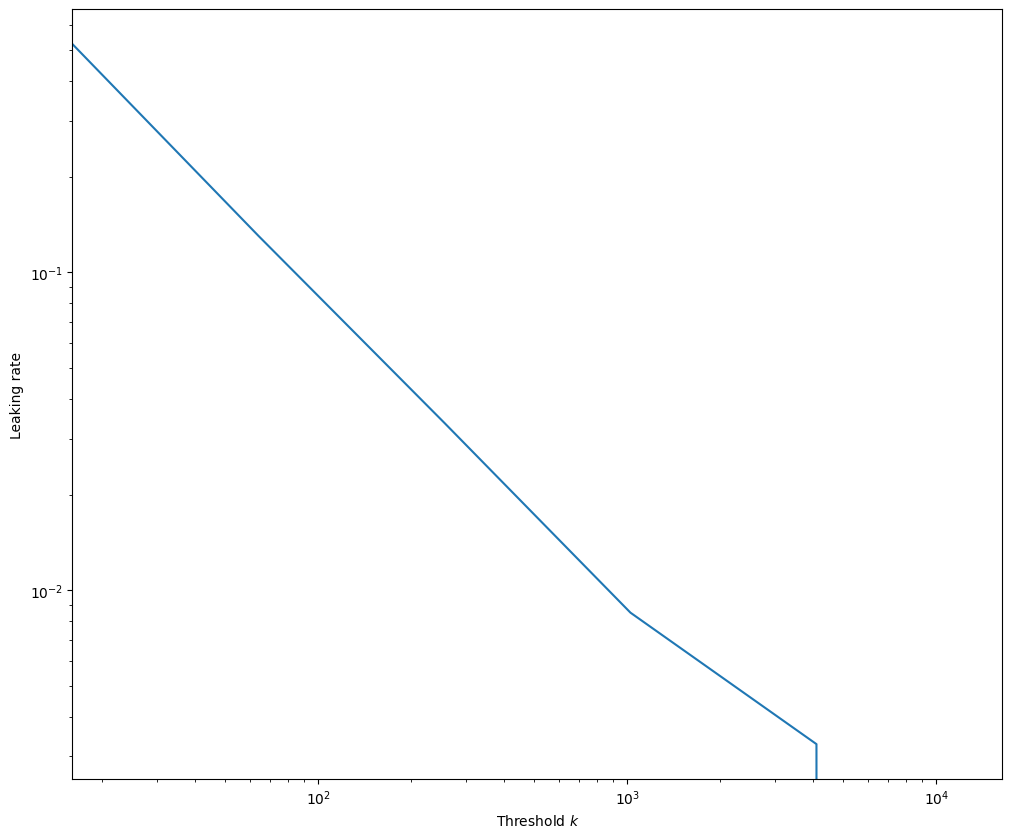

In [60]:
fig=plt.figure(figsize=[12, 10])
plt.loglog(res['k'], res['leak'])
plt.xlabel('Threshold $k$')
plt.ylabel('Leaking rate')
plt.xlim([k_vect[0], k_vect[-1]])
tikzplotlib_fix_ncols(fig)
tikzplotlib.save(f"codomino_loglog_{digits}.tex", axis_width="6.5cm", axis_height="6cm")
plt.show()